# Introduction to Constrained Continuous Optimization

```{admonition} Learning outcomes
After reading this note, you will be able to:
- Define optimality conditions for constrained problems
- Model and solve linear optimization problems
- Model and solve non-linear optimization problems
```

## Problem statement and definitions

Many applications of optimization require solutions that satisfy a set of *constraints*. For example, in a Vehicle Routing Problem (VRP), one seeks to route a set of trucks through a set of customer locations while minimizing the total travel time; constraints are needed to ensure that each customer is serviced by exactly one truck, that each truck starts its route at the depot and returns to it, and that truck capacities are not exceeded. In a workforce scheduling problem, workers are assigned tasks such that they perform at most one task at any given time and are not overworked overall.

Formally, a constraint should be seen as an expression of the form:
```{math}
c'(\boldsymbol{x}) \leq b.
````
The left-hand side is the output of a real-valued function $c': \mathbb{R}^n\mapsto\mathbb{R}$ that maps an assignment of values to the variables $\boldsymbol{x}$ to a scalar value. That value is then compared to the right-hand side, $b\in\mathbb{R}$. Constraints of the form $c'(\boldsymbol{x}) \geq b$ can be expressed as $-c(\boldsymbol{x}) \leq -b$ so we will use less-than-or-equal constraints without loss of generality. It is equivalent to redefine the left-hand side to $c(\boldsymbol{x}) = c'(\boldsymbol{x}) - {b}$ so that an inequality constraint can be rewritten as:
```{math}
c(\boldsymbol{x}) \leq 0.
````

For example, if a variable $x_i\in\mathbb{R}$ represents the amount of money spent towards acquiring a certain product and there is a budget of $b$ dollars, then $c(\boldsymbol{x})=\sum_{i=1}^{n}{x_i}-b$. Bound constraints are also commonly used. For instance, you cannot spend a negative amount of money or more than a certain amount $d$ for a specific product, meaning that $c_{i1}(x_i)=x_i-d$, $c_{i2}(x_i)=-x_i$ and the constraints are written as $c_{i1}(x_i)\leq 0$ and $c_{i2}(x_i)\leq 0$.

Alternatively, one may need to enforce an *equality constraint*:
```{math}
c(\boldsymbol{x}) = 0.
````
We will use $[m]$ to denote the set of integers from $1$ to $m$ inclusive, i.e., $[m]=\{1,\cdots,m\}$. For a constrained optimization problem with $m$ constraints, we will split the set $[m]$ of constraint indices into two disjoint subsets: $\mathcal{I}$, the set of inequality constraints and $\mathcal{E}$, the set of equality constraints. One of these sets may be empty and their union is equal to $m$, i.e., $\mathcal{I}\cup\mathcal{E}=[m]$. A continuous constrained optimization problem on $n$ continuous variables can then be expressed as follows:
```{math}
\min_{\boldsymbol{x}\in\mathbb{R}^n} \quad & f(\boldsymbol{x})\\
\text{subject to} \quad & c_i(\boldsymbol{x}) \leq 0, \quad\forall i\in\mathcal{I},\\
& c_i(\boldsymbol{x}) = 0, \quad\forall i\in\mathcal{E}.
````

We will use $\Omega=\{\boldsymbol{x}\in\mathbb{R}^n \;|\; c_i(\boldsymbol{{x}}) \leq 0, \forall i\in\mathcal{I}, c_i(\boldsymbol{{x}}) = 0, \forall i\in\mathcal{E}\}$ to denote the *feasible set* defined as the points of $\mathbb{R}^n$ that satisfy all constraints. This allows us to rewrite the generic constrained optimization problem as:
```{math}
\min_{\boldsymbol{x}\in\Omega} f(\boldsymbol{x}).
````
An minimization problem is *unbounded* if $\Omega$ is non-empty but the constraints in $\mathcal{I}$ and $\mathcal{E}$ do not restrict the objective function $f$, i.e., $f(\boldsymbol{{x}})$ can be made arbitrarily small.

An optimization problem is *infeasible* if $\Omega$ is empty, meaning that there does not exist *any* point in $\mathbb{R}^n$ that simultaneously satisfies all constraints in $\mathcal{I}$ and $\mathcal{E}$.

With this new notation we can now define local and global minimizers of a constrained problem.

```{prf:definition} Local minimizer of a constrained problem
:label: local-min-cons
A *weak local minimizer* is a **feasible point** $\hat{\boldsymbol{x}}$ that minimizes the objective function $f$ within a neighborhood. Let $\mathcal{N}=\{\boldsymbol{x}\in\mathbb{R}^n\;|\;\lVert \boldsymbol{x}-\hat{\boldsymbol{x}}\rVert<\delta\}$ be the neighborhood consisting of points within distance less than $\delta$ from $\hat{\boldsymbol{x}}$. Then, $\hat{\boldsymbol{x}}$ is a local minimizer if there exists a $\delta > 0$ such that $f(\hat{\boldsymbol{x}}) \leq  f(x)$ for all ${\boldsymbol{x}}\in\Omega\cap\mathcal{N}$.

A *strong local minimizer* is a weak local minimizer which is strictly better than all other points in a neighborhood, i.e., $f(\hat{\boldsymbol{x}}) <  f(x)$ for all ${\boldsymbol{x}}\in\Omega\cap\mathcal{N}, \boldsymbol{x} \neq \hat{\boldsymbol{x}}$.
```
The main difference between this definition and that of an unconstrained local minimizer from the previous chapter is that the neighborhood around $\hat{\boldsymbol{x}}$  consists only of feasible points, i.e., points that are with $\delta$ of $\hat{\boldsymbol{x}}$ but that are *infeasible* in the constraint may have $f(\hat{\boldsymbol{x}}) >  f(x)$. Such points have better objective values but they are not of interest to us because they are infeasible.

```{prf:definition} Global minimizer of a constrained problem
:label: opt-sol
A *global minimizer* is a feasible solution $\boldsymbol{x^\star}\in\Omega$ that is as good as any other feasible solution, i.e., $f({\boldsymbol{x^\star}}) \leq  f(\boldsymbol{x})$ for all $\boldsymbol{x}\in\Omega$. There may be multiple global minima.
```


In [202]:
from sympy import * #Symbol, symbols, sin, cos, Polygon, solve, lambdify, Rational, pi, N
from sympy.plotting import plot
from spb import *
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.rcParams['figure.dpi'] = 300

sns.set_theme()
sns.set_context("notebook", font_scale=1.1, rc={"lines.linewidth": 3.5})
sns.set_style("white")
sns.set_style("ticks")
plt.rcParams.update({
    "text.usetex": True,
    # "font.family": "courier",
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

## Affine/linear constraints and halfspaces

The *dot product* $\boldsymbol{w}\cdot\boldsymbol{x}$ is the sum of the elementwise products of the two vectors, i.e., $\boldsymbol{w}\cdot\boldsymbol{x}=\sum_{i=1}^{n}w_i x_i$.

*Affine constraints* are some of the most widely used in optimization. They can be expressed as $c(\boldsymbol{x})\leq 0$ or $c(\boldsymbol{x}) = 0$ where $c(\boldsymbol{x})=\boldsymbol{w}\cdot\boldsymbol{x} - b$. The vector $\boldsymbol{w}\in\mathbb{R}^n$ is the *normal vector* of the set of points that live on the affine hyperplane $\boldsymbol{w}\cdot\boldsymbol{x} = b$. Note that an affine hyperplane is simply a *plane* for $n=2$ and a line for $n=1$.

When $b=0$, we refer to $\boldsymbol{w}\cdot\boldsymbol{x} = 0$ simply as a *hyperplane* and drop "affine"; because $b=0$, the hyperplane goes through the origin of $\mathbb{R}^n$.

For simplicity in this lecture, we will refer to an affine constraint as a *linear constraint* regardles off the value of $b$.

A hyperplane splits the space it lies in into two *halfspaces*: the points that are "above" it and those that are "below" it. The next figure illustrates this. The halfspace "above" the hyperplane $\boldsymbol{w}\cdot\boldsymbol{x} = b$ consists of points that satisfy $\boldsymbol{w}\cdot\boldsymbol{x} \geq b$ and vice versa for the halfspace "below".

<!-- Note that a *point* $(x_1,x_2)\in\mathbb{R}^2$, for example, corresponds to a *vector* that starts at the origin $(0,0)$ and ends at that point.  -->

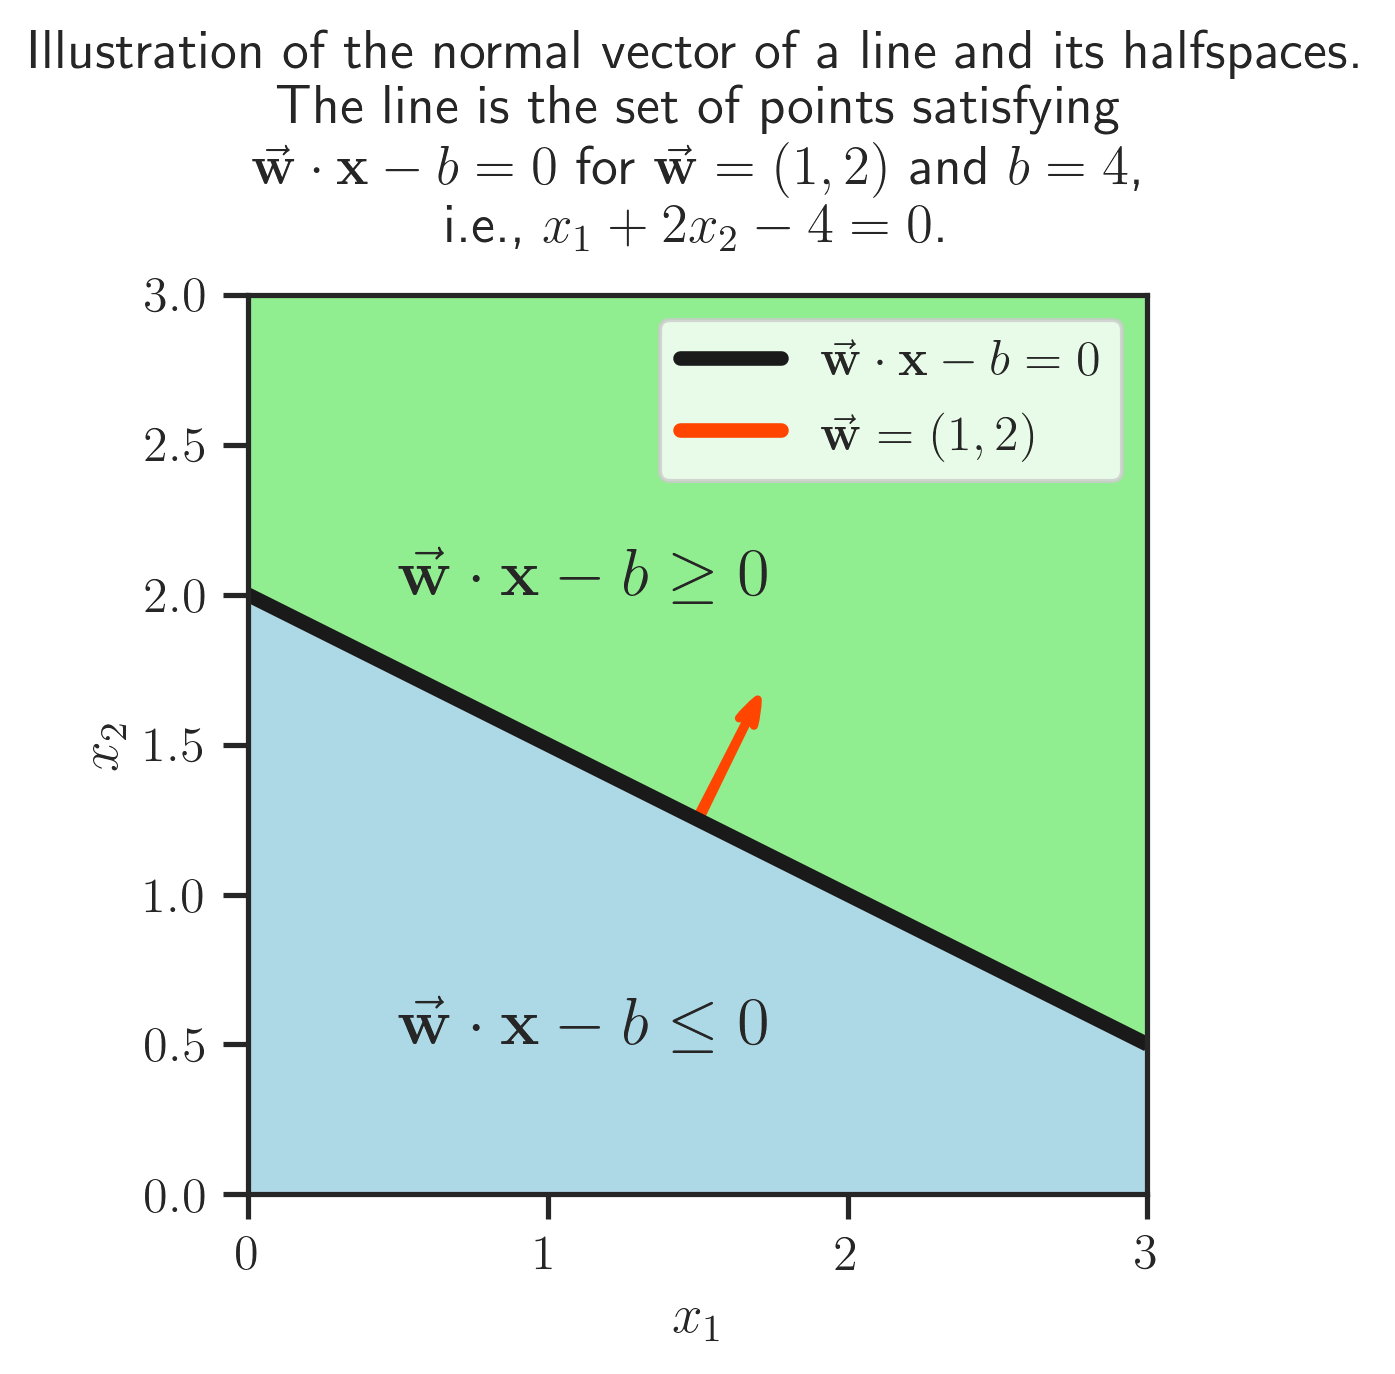

In [203]:
fig, ax = plt.subplots()
# ax.set_axis_off()

x1_dir, x2_dir = 1, 2
x1, x2 = symbols('x1 x2')
p1_ = plot_implicit(
    Eq(x1_dir*x1 + x2_dir*x2 - 4, 0),
    (x1, 0, 3), (x2, 0, 3),
    {"linestyles": "-"}, label='$\\vec{\\mathbf{w}}\\cdot\\mathbf{x}-b=0$', aspect="equal", color='k',
    show=False, grid=False, show_in_legend=True, fig=fig, ax=ax)

ax.set_title(
    "Illustration of the normal vector of a line and its halfspaces.\n\
    The line is the set of points satisfying \n$\\vec{\\mathbf{w}}\\cdot\\mathbf{x}-b=0$ \
    for $\\vec{\\mathbf{w}}=(1,2)$ and $b=4$,\ni.e., $x_1+2x_2-4=0$.", y=1.03)

p2_ = plot_implicit(x1_dir*x1 + x2_dir*x2 - 4 <= 0, color='lightblue', show=False, grid=False, show_in_legend=False, fig=fig, ax=ax)
p3_ = plot_implicit(x1_dir*x1 + x2_dir*x2 - 4 > 0, color='lightgreen', show=False, grid=False, show_in_legend=False, fig=fig, ax=ax)
p4_ = plt.text(.5, .5, '$\\vec{\\mathbf{w}}\\cdot\\mathbf{x}-b\\leq 0$', fontsize=16)
p5_ = plt.text(.5, 2, '$\\vec{\\mathbf{w}}\\cdot\\mathbf{x}-b\\geq 0$', fontsize=16)

obj_vec = graphics(arrow_2d((1.5, 1.25), (.2*x1_dir, .2*x2_dir), rendering_kw={'color':'orangered','linewidth':2}, 
                            show_in_legend=True, label='\\vec{\\mathbf{w}}=(1,2)'), show=False, fig=fig, ax=ax)

p1_.append(p2_[0])
p1_.append(p3_[0])
p1_.append(obj_vec[0])
p1_.show()

/Users/lyes/Dropbox/UofT/Teaching/MIE1666_F24/1666env/lib/python3.10/site-packages/spb/series.py:2255: UserWarning: The provided expression contains Boolean functions. In order to plot the expression, the algorithm automatically switched to an adaptive sampling.


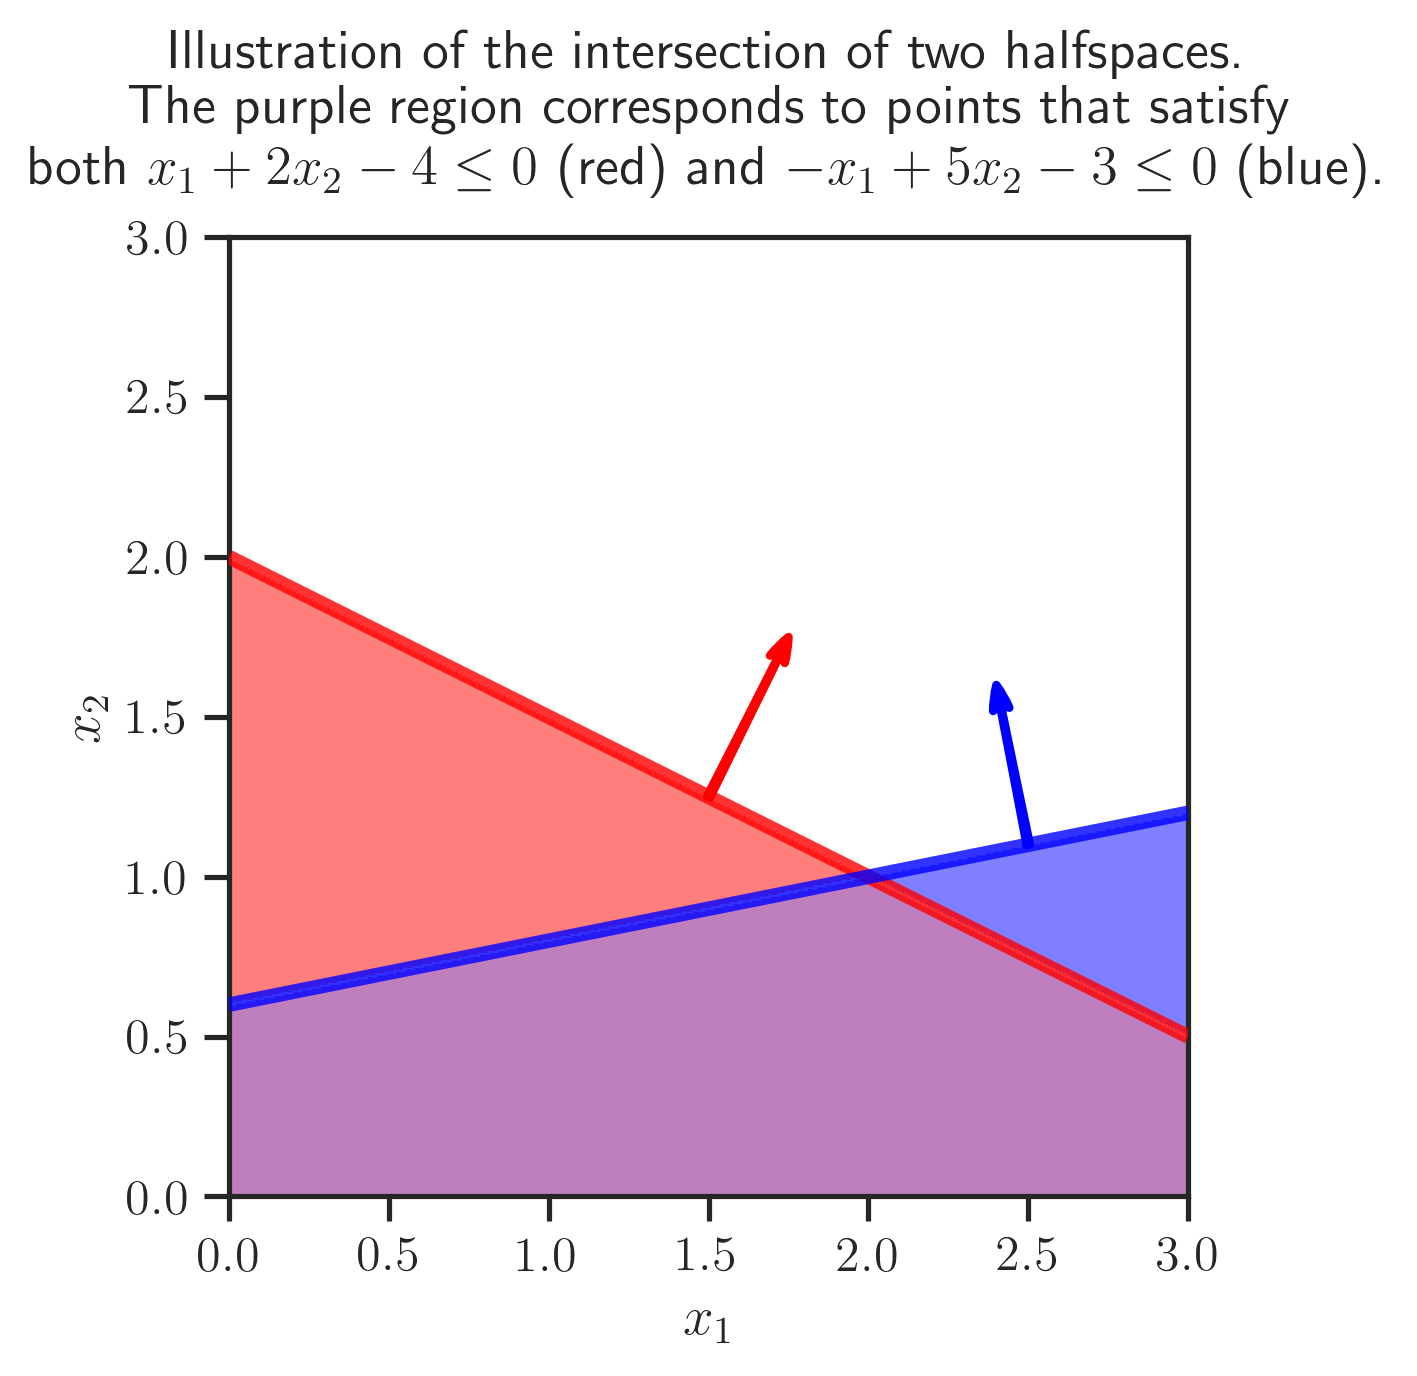

In [204]:
fig, ax = plt.subplots()
# ax.set_axis_off()

colors = ['red','blue','purple']
x1_dir, x2_dir = 1, 2
x1, x2 = symbols('x1 x2')
line1 = x1_dir*x1 + x2_dir*x2 - 4
line2 = -x1 + 5*x2 -3
p1 = plot_implicit(
    Eq(line1, 0),
    (x1, 0, 3), (x2, 0, 3),
    {"linestyles": "-",'alpha':.8,'zorder':100}, aspect="equal", color=colors[0],
    show=False, grid=False, show_in_legend=False, fig=fig, ax=ax)

p2 = plot_implicit(
    Eq(line2, 0),
    (x1, 0, 3), (x2, 0, 3),
    {"linestyles": "-",'alpha':.8,'zorder':100}, aspect="equal", color=colors[1],
    show=False, grid=False, show_in_legend=False, fig=fig, ax=ax)

p3 = plot_implicit(
    And(line1 < 0, line2 < 0),
    (x1, 0, 3), (x2, 0, 3),
    {'alpha':.5}, color=colors[2], 
    show=False, grid=False, show_in_legend=False, fig=fig, ax=ax)

p4 = plot_implicit(
    And(line1 < 0, line2 > 0),
    (x1, 0, 3), (x2, 0, 3),
    {'alpha':.5}, color=colors[0], 
    show=False, grid=False, show_in_legend=False, fig=fig, ax=ax)

p5 = plot_implicit(
    And(line1 > 0, line2 < 0),
    (x1, 0, 3), (x2, 0, 3),
    {'alpha':.5}, color=colors[1], 
    show=False, grid=False, show_in_legend=False, fig=fig, ax=ax)

ax.set_title(
    "Illustration of the intersection of two halfspaces.\n\
    The purple region corresponds to points that satisfy\nboth $%s\\leq0$ (red) and $%s\\leq0$ (blue)." % (latex(line1),latex(line2)), y=1.03)

vecs = graphics(arrow_2d((1.5, 1.25), (.25*x1_dir, .25*x2_dir), rendering_kw={'color':colors[0],'linewidth':2}, show_in_legend=False), 
                arrow_2d((2.5, 5.5/5), (-.1, .5), rendering_kw={'color':colors[1],'linewidth':2}, show_in_legend=False), 
                show=False, fig=fig, ax=ax)


p1.append(p2[0])
p1.append(p3[0])
p1.append(p4[0])
p1.append(p5[0])
p1.append(vecs[0])
p1.append(vecs[1])
p1.show()

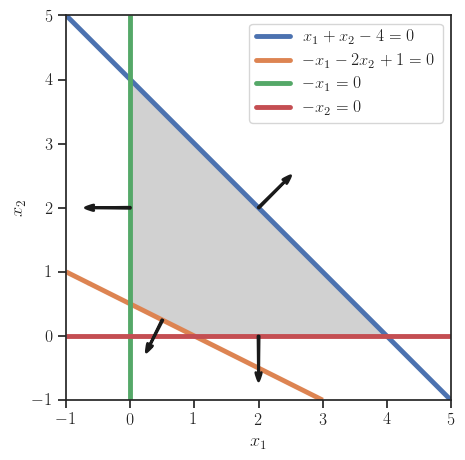

In [160]:
x1, x2 = symbols('x1 x2')
p1 = plot_implicit(
    Eq(x1 + x2 - 4, 0),
    Eq(-x1 + -2*x2 + 1, 0),
    Eq(-x1, 0),
    Eq(-x2, 0),
    (x1, -1, 5), (x2, -1, 5),
    rendering_kw={"linestyles": "-"}, aspect="equal",
    show=False, grid=False)

p2 = plot_implicit(
    And(x1 + x2 - 4 <= 0, -x1 + -2*x2 + 1 <= 0, -x1 <= 0, -x2 <= 0),
    (x1, -1, 5), (x2, -1, 5),
    {'alpha':0.2}, color='k', show=False, grid=False, show_in_legend=False)

vecs = graphics(arrow_2d((2, 2), (.5, .5), rendering_kw={'color':'k','linewidth':2,'zorder':100}, show_in_legend=False), 
                arrow_2d((0.5, .25), (-.25, -.5), rendering_kw={'color':'k','linewidth':2,'zorder':100}, show_in_legend=False),
                arrow_2d((2, 0), (0, -.7), rendering_kw={'color':'k','linewidth':2,'zorder':100}, show_in_legend=False),
                arrow_2d((0, 2), (-.7, 0), rendering_kw={'color':'k','linewidth':2,'zorder':100}, show_in_legend=False),
                show=False, fig=fig, ax=ax)

p1.append(p2[0])
for vec in vecs:
    p1.append(vec)
p1.show()

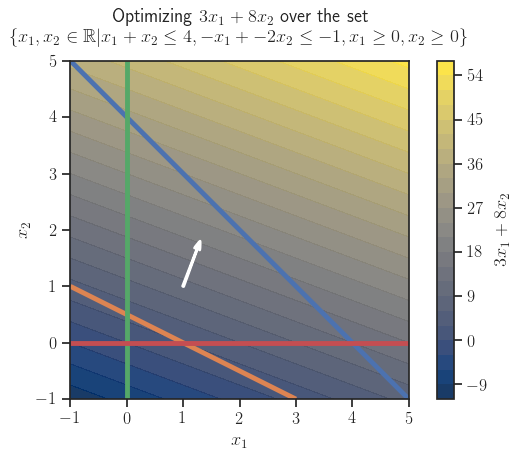

In [118]:
fig, ax = plt.subplots()
# ax.set_axis_off()

x1, x2 = symbols('x1 x2')
p1 = plot_implicit(
    Eq(x1 + x2 - 4, 0),
    Eq(-x1 + -2*x2 + 1, 0),
    Eq(x1, 0),
    Eq(x2, 0),
    (x1, -1, 5), (x2, -1, 5),
    {"linestyles": "-"}, aspect="equal",
    show=False, grid=False, show_in_legend=False, fig=fig, ax=ax)

objective_function = 3*x1+8*x2
objective_contour = plot_contour(objective_function,  (x1, -1, 5), (x2, -1, 5), 
                                 {"levels": 25, "cmap": "cividis", "alpha":0.9, "linestyles": "-", "linewidths": 1.5}, 
                                 is_filled=True, show=False, legend=False, fig=fig, ax=ax)

ax.set_title(
    "Optimizing $%s$ over the set\n $\{x_1, x_2\in\mathbb{R} | x_1 + x_2 \leq 4, -x_1 + -2x_2 \leq -1, x_1 \geq 0, x_2 \geq 0\}$"
    % latex(objective_function),y=1.03)

obj_vec = graphics(arrow_2d((1, 1), (.3, .8), rendering_kw={'color':'w','linewidth':2}, show_in_legend=False), show=False, fig=fig, ax=ax)
p1.append(objective_contour[0])
p1.append(obj_vec[0])
p1.show()

<!-- <!--  -->
Constrained opt

Taylor 1st order 
https://mathinsight.org/dot_product


Constraints, polytopes, QLP illustration

LP

https://en.wikipedia.org/wiki/Lagrange_multiplier#Examples

https://github.com/mechmotum/cyipopt/blob/master/examples/hs071_scipy_jax.py

Solvers (cvxpy, ipopt)
 -->

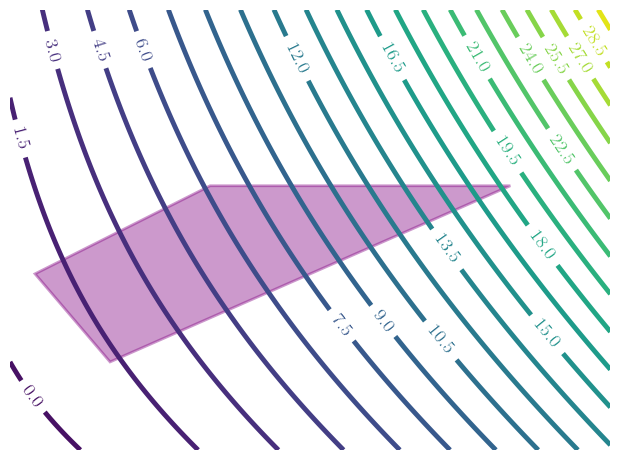

In [23]:
fig, ax = plt.subplots()
ax.set_axis_off()

x1, x2 = symbols('x1 x2')
line1 = x1 + x2
quadratic1 = x1*x2 + 0.3*x1**2 + line1
objective_contour = plot_contour(quadratic1,  (x1, 0, 6), (x2, -0.5, 2), {"levels": 25}, is_filled=False, show=False, legend=False, fig=fig, ax=ax)

pt1, pt2, pt3, pt4, pt5 = [(0.25, 0.5), (1, 0), (5, 1), (0, 1), (2, 1)]
polytope = plot_geometry(Polygon(pt1, pt2, pt3, pt4, pt5), dict(color="purple", linewidth=2, label='', alpha=0.4), show_in_legend=False, is_filled=True, show=False, fig=fig, ax=ax)

objective_contour.append(polytope[0])
objective_contour.show()

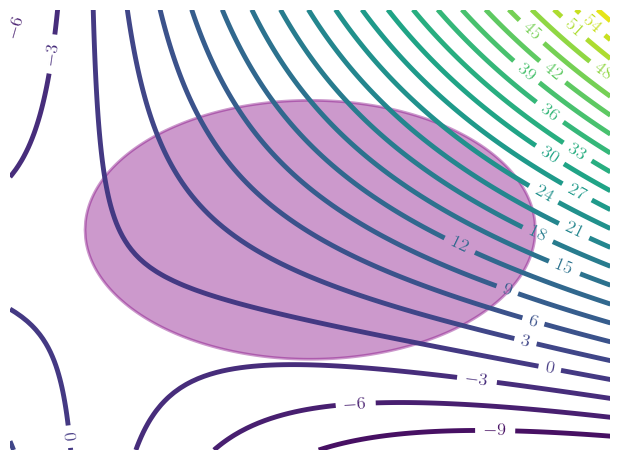

In [24]:
fig, ax = plt.subplots()
ax.set_axis_off()

x1, x2 = symbols('x1 x2')
line1 = x1 + x2
quadratic1 = x1*x2 + 0.3*x1**2 + line1
objective_contour = plot_contour(quadratic1,  (x1, -2, 6), (x2, -4, 6), {"levels": 25}, is_filled=False, show=False, legend=False, fig=fig, ax=ax)

# pt1, pt2, pt3, pt4, pt5 = [(0.25, 0.5), (1, 0), (5, 1), (0, 1), (2, 1)]
# polytope = plot_geometry(Polygon(pt1, pt2, pt3, pt4, pt5), dict(color="purple", linewidth=2, label='', alpha=0.4), show_in_legend=False, is_filled=True, show=False, fig=fig, ax=ax)
ellipse = plot_geometry(Ellipse(Point(2, 1), hradius=3, eccentricity=Rational(1, 5)), dict(color="purple", linewidth=2, label='', alpha=0.4), show_in_legend=False, is_filled=True, show=False, fig=fig, ax=ax)

objective_contour.append(ellipse[0])
objective_contour.show()
